In [1]:
import fiona
import geopandas as gpd
import pandas as pd
import matplotlib as plt

In [2]:
data_trees = pd.read_excel('full report per tree.xlsx')
full_trees_dataset = pd.read_excel('../modifiedDataset.xlsx')
data_trees_composition = pd.read_excel('composition recap.xlsx')
data_trees_oxygen = pd.read_excel('oxygen recap.xlsx')

data_trees_composition.columns


Index(['Unnamed: 0', 'Tree ID', 'Species Name', 'DBH', 'Height',
       'Crown Height', 'Crown Width', 'Canopy Cover', 'Tree Condition',
       'Leaf Area', 'Leaf Biomass', 'Leaf Area Index', 'Basal Area',
       'Unnamed: 13', 'Native to State'],
      dtype='object')

In [3]:
data_trees_oxygen.drop('Unnamed: 0', axis = 1,inplace=True)
data_trees_oxygen.drop(index=0,inplace=True)

data_trees_composition.drop('Unnamed: 0', axis = 1,inplace=True)
data_trees_composition.drop(index=0,inplace=True)

In [4]:
data_trees.columns

Index(['Tree ID', 'Species Name', 'DBH', 'Replacement Value', 'Carbon Storage',
       'Unnamed: 5', 'Gross Carbon\nSequestration', 'Unnamed: 7',
       'Avoided Runoff', 'Unnamed: 9', 'Carbon Avoided', 'Unnamed: 11',
       'Pollution Removal', 'Unnamed: 13', 'Energy\nSavings',
       'Total Annual\nBenefits'],
      dtype='object')

In [5]:
data_trees.rename(columns={'Carbon Storage':'Carbon Storage (kg)'},inplace=True)
data_trees.rename(columns={'Species Name':'Name'},inplace=True)
data_trees.rename(columns={'DBH':'DBH (cm)'},inplace=True)
data_trees.rename(columns={'Replacement Value':'Replacement Value (eur)'},inplace=True)
data_trees.rename(columns={'Unnamed: 5':'Carbon Storage (eur)'},inplace=True)
data_trees.rename(columns={'Gross Carbon\nSequestration':'Gross Carbon Sequestration (kg/yr)'},inplace=True)
data_trees.rename(columns={'Unnamed: 7':'Gross Carbon Sequestration (eur/yr)'},inplace=True)
data_trees.rename(columns={'Avoided Runoff':'Avoided Runoff (mcube/yr)'},inplace=True)
data_trees.rename(columns={'Unnamed: 9':'Avoided Runoff (eur/yr)'},inplace=True)
data_trees.rename(columns={'Carbon Avoided':'Carbon Avoided (kg/yr)'},inplace=True)
data_trees.rename(columns={'Unnamed: 11':'Carbon Avoided (eur/yr)'},inplace=True)
data_trees.rename(columns={'Pollution Removal':'Pollution Removal (g/yr)'},inplace=True)
data_trees.rename(columns={'Unnamed: 13':'Pollution Removal (eur/yr)'},inplace=True)
data_trees.rename(columns={'Energy\nSavings':'Energy Savings (eur/yr)'},inplace=True)
data_trees.rename(columns={'Total Annual\nBenefits':'Total Annual Benefits (eur/yr)'},inplace=True)

In [6]:
data_trees.drop(index=0,inplace=True)

C:\Users\Giacomo\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

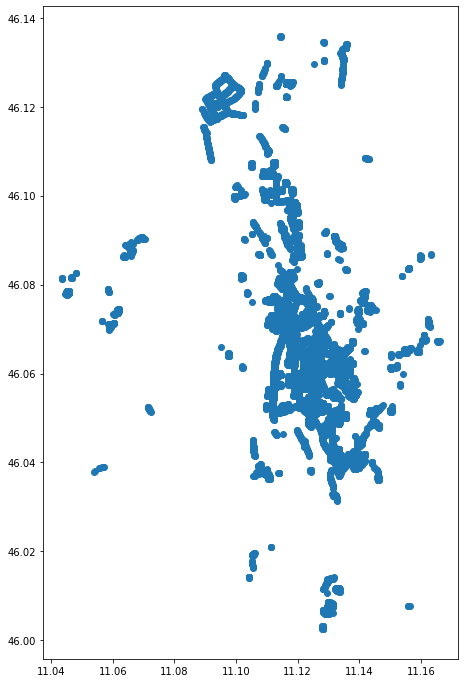

In [7]:
data_trees['Oxygen Production (kg/yr)'] = data_trees_oxygen['Oxygen Production']
data_trees['Height (m)'] = data_trees_composition['Height']
data_trees['Crown Height (m)'] = data_trees_composition['Crown Height']
data_trees['Crown Width (m)'] = data_trees_composition['Crown Width']
data_trees['Canopy Cover (m2)'] = data_trees_composition['Canopy Cover']
data_trees['Leaf Area (m2)'] = data_trees_composition['Leaf Area']
data_trees['Leaf Biomass (kg)'] = data_trees_composition['Leaf Biomass']
data_trees['Latitude'] = full_trees_dataset['latitude']
data_trees['Longitude'] = full_trees_dataset['longitude']


data_trees.to_excel('modifiedReport.xlsx')

geo_data_trees = gpd.GeoDataFrame(
    data_trees,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(data_trees.Longitude, data_trees.Latitude))

geo_data_trees.to_file("../leaflet/geo_data_trees.geojson",driver="GeoJSON")

geo_data_trees.plot(figsize=(12,12))



